# Stock-Price-Forecasting Wrangling and EDA

Import modules and load in the csv files with the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
aapl = pd.read_csv('aapl stock.csv')
googl = pd.read_csv('googl stock.csv')
nke = pd.read_csv('nke stock.csv')
amzn = pd.read_csv('amzn stock.csv')
vz = pd.read_csv('vz stock.csv')

### First I will look at the head of each set, find the dtypes, and make sure each only has one input for the 'Name' column

In [3]:
aapl.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [4]:
googl.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [5]:
nke.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.85,10.92,10.67,10.74,18468800,NKE
1,2006-01-04,10.71,10.80,10.67,10.69,15832000,NKE
2,2006-01-05,10.69,10.83,10.69,10.76,9256000,NKE
3,2006-01-06,10.79,10.83,10.71,10.72,7573600,NKE
4,2006-01-09,10.72,10.98,10.72,10.88,10441600,NKE


In [6]:
amzn.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


In [7]:
vz.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,30.20,30.47,30.04,30.38,12903800,VZ
1,2006-01-04,30.57,31.29,30.45,31.27,31004500,VZ
2,2006-01-05,31.28,31.91,31.22,31.63,20664000,VZ
3,2006-01-06,31.60,31.60,31.16,31.35,57704300,VZ
4,2006-01-09,31.39,31.52,31.21,31.48,17600000,VZ


In [8]:
print(aapl.dtypes)

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
Name       object
dtype: object


In [9]:
print(amzn.dtypes)

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
Name       object
dtype: object


In [10]:
print(googl.dtypes)

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
Name       object
dtype: object


In [11]:
print(nke.dtypes)

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
Name       object
dtype: object


In [12]:
print(vz.dtypes)

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
Name       object
dtype: object


In [13]:
print(aapl['Name'].unique())
print(amzn['Name'].unique())
print(googl['Name'].unique())
print(nke['Name'].unique())
print(vz['Name'].unique())

['AAPL']
['AMZN']
['GOOGL']
['NKE']
['VZ']


### I need to create datetime objects for the timestamps

In [14]:
aapl['ds'] = pd.DatetimeIndex(aapl['Date'])
amzn['ds'] = pd.DatetimeIndex(amzn['Date'])
googl['ds'] = pd.DatetimeIndex(googl['Date'])
nke['ds'] = pd.DatetimeIndex(nke['Date'])
vz['ds'] = pd.DatetimeIndex(vz['Date'])

In [15]:
print(aapl.dtypes)
print(amzn.dtypes)
print(googl.dtypes)
print(nke.dtypes)
print(vz.dtypes)

Date              object
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
Name              object
ds        datetime64[ns]
dtype: object
Date              object
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
Name              object
ds        datetime64[ns]
dtype: object
Date              object
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
Name              object
ds        datetime64[ns]
dtype: object
Date              object
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
Name              object
ds        datetime64[ns]
dtype: object
Date              object
Open             float64
High             float64
Low              float64
Close            float64
Volume             

### I am not going to include the High, Low, or Volume so I will drop those columns, I can also drop the Date and Name column since 'ds' is my datetime object, and the ticker name is the name of the df

In [16]:
aapl = aapl.drop(columns=['High', 'Low', 'Volume', 'Date', 'Name'])
amzn = amzn.drop(columns=['High', 'Low', 'Volume', 'Date', 'Name'])
googl = googl.drop(columns=['High', 'Low', 'Volume', 'Date', 'Name'])
nke = nke.drop(columns=['High', 'Low', 'Volume', 'Date', 'Name'])
vz = vz.drop(columns=['High', 'Low', 'Volume', 'Date', 'Name'])

## Now I will look at some of the features of the data graphically, I will look at scatterplots and lineplots of the close price per date, and scatterplots of the open price vs close price

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

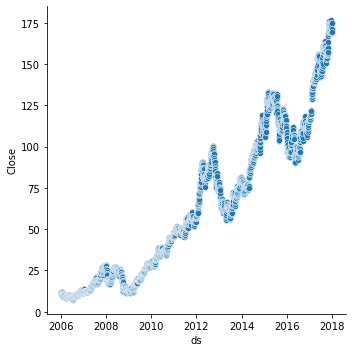

In [18]:
sns.relplot(y='Close', x='ds', data=aapl)

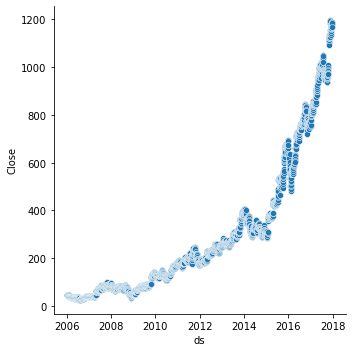

In [19]:
sns.relplot(y='Close', x='ds', data=amzn)

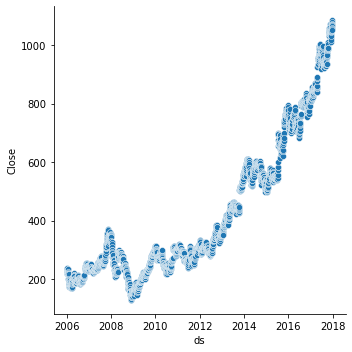

In [20]:
sns.relplot(y='Close', x='ds', data=googl)

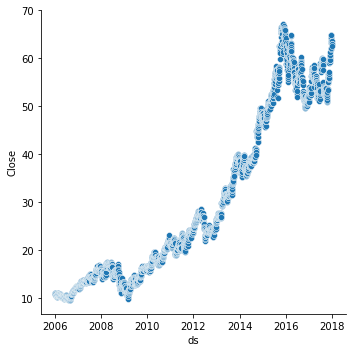

In [21]:
sns.relplot(y='Close', x='ds', data=nke)

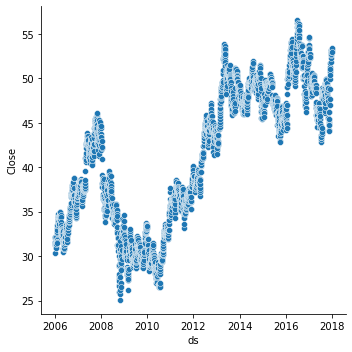

In [22]:
sns.relplot(y='Close', x='ds', data=vz)

<AxesSubplot:xlabel='ds', ylabel='Close'>

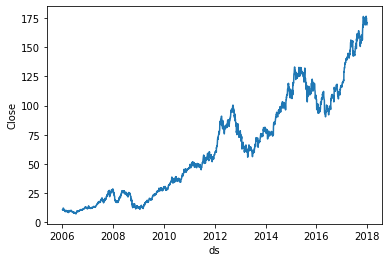

In [23]:
sns.lineplot(y='Close', x='ds', data=aapl)

<AxesSubplot:xlabel='ds', ylabel='Close'>

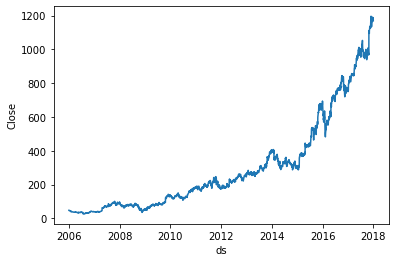

In [24]:
sns.lineplot(y='Close', x='ds', data=amzn)

<AxesSubplot:xlabel='ds', ylabel='Close'>

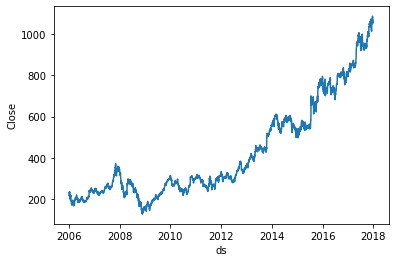

In [25]:
sns.lineplot(y='Close', x='ds', data=googl)

<AxesSubplot:xlabel='ds', ylabel='Close'>

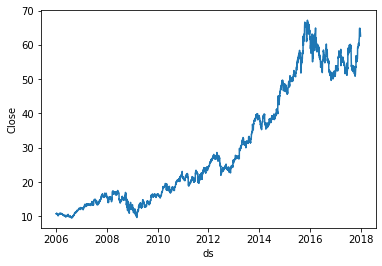

In [26]:
sns.lineplot(y='Close', x='ds', data=nke)

<AxesSubplot:xlabel='ds', ylabel='Close'>

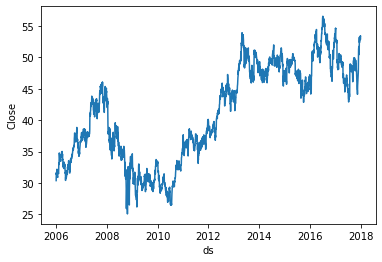

In [27]:
sns.lineplot(y='Close', x='ds', data=vz)

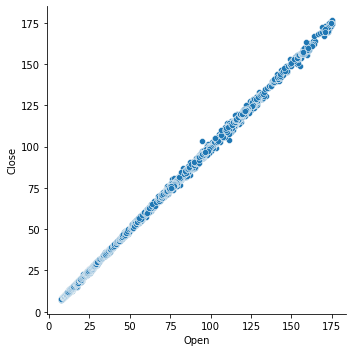

In [28]:
sns.relplot(x='Open', y='Close', data=aapl)

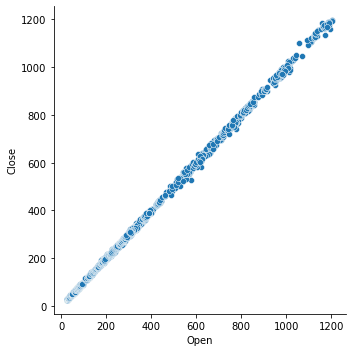

In [29]:
sns.relplot(x='Open', y='Close', data=amzn)

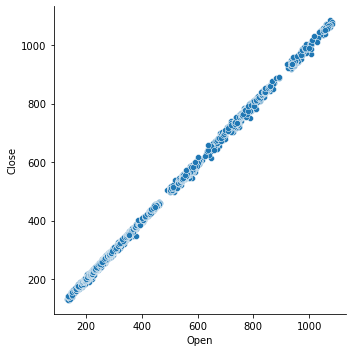

In [30]:
sns.relplot(x='Open', y='Close', data=googl)

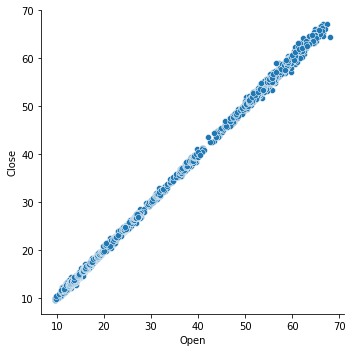

In [31]:
sns.relplot(x='Open', y='Close', data=nke)

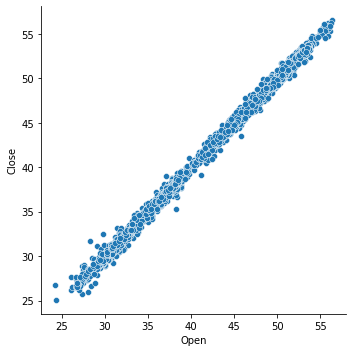

In [32]:
sns.relplot(x='Open', y='Close', data=vz)

In [33]:
aapl.describe()

,Open,Close
count,3019.000000,3019.000000
mean,64.673309,64.662892
std,44.524927,44.536448
min,7.390000,7.240000
25%,23.425000,23.420000
50%,57.860000,57.920000
75%,99.165000,99.480000
max,175.110000,176.420000


In [34]:
amzn.describe()

,Open,Close
count,3019.000000,3019.000000
mean,299.335310,299.376231
std,280.120547,279.980161
min,26.090000,26.070000
25%,81.175000,81.090000
50%,205.330000,205.440000
75%,375.570000,375.140000
max,1204.880000,1195.830000


In [35]:
googl.describe()

,Open,Close
count,3019.000000,3019.000000
mean,428.200802,428.044001
std,236.320026,236.343238
min,131.390000,128.850000
25%,247.775000,247.605000
50%,310.480000,310.080000
75%,572.140000,570.770000
max,1083.020000,1085.090000


In [36]:
nke.describe()

,Open,Close
count,3019.000000,3020.000000
mean,29.893114,29.916977
std,17.191774,17.195567
min,9.560000,9.520000
25%,15.110000,15.150000
50%,23.580000,23.535000
75%,47.680000,47.712500
max,68.120000,67.160000


In [37]:
vz.describe()

,Open,Close
count,3019.000000,3020.000000
mean,41.142133,41.143642
std,7.683123,7.694002
min,24.180000,25.080000
25%,34.595000,34.600000
50%,42.400000,42.475000
75%,48.135000,48.120000
max,56.320000,56.530000


## Identify missing values, drop if necessary

In [38]:
aapl.isna().sum()

Open     0
Close    0
ds       0
dtype: int64

In [39]:
amzn.isna().sum()

Open     0
Close    0
ds       0
dtype: int64

In [40]:
googl.isna().sum()

Open     0
Close    0
ds       0
dtype: int64

In [41]:
nke.isna().sum()

Open     1
Close    0
ds       0
dtype: int64

In [42]:
vz.isna().sum()

Open     1
Close    0
ds       0
dtype: int64

In [43]:
nke = nke.dropna()

In [44]:
vz = vz.dropna()

In [45]:
vz.isna().sum()

Open     0
Close    0
ds       0
dtype: int64

## I am going to create 'Month', 'Week' and 'Year' columns for each dataframe to further graph relationships

In [46]:
aapl['Month'] = pd.DatetimeIndex(aapl['ds']).month
aapl['Year'] = pd.DatetimeIndex(aapl['ds']).year
aapl['Week'] = pd.DatetimeIndex(aapl['ds']).week

/var/folders/s8/vnwvq4w55bl0dxqxvjd8p0ln53fqlf/T/ipykernel_13953/2786785351.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  aapl['Week'] = pd.DatetimeIndex(aapl['ds']).week


In [47]:
amzn['Month'] = pd.DatetimeIndex(amzn['ds']).month
amzn['Year'] = pd.DatetimeIndex(amzn['ds']).year
amzn['Week'] = pd.DatetimeIndex(amzn['ds']).week

/var/folders/s8/vnwvq4w55bl0dxqxvjd8p0ln53fqlf/T/ipykernel_13953/761731763.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  amzn['Week'] = pd.DatetimeIndex(amzn['ds']).week


In [48]:
googl['Month'] = pd.DatetimeIndex(googl['ds']).month
googl['Year'] = pd.DatetimeIndex(googl['ds']).year
googl['Week'] = pd.DatetimeIndex(googl['ds']).week

/var/folders/s8/vnwvq4w55bl0dxqxvjd8p0ln53fqlf/T/ipykernel_13953/2567707594.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  googl['Week'] = pd.DatetimeIndex(googl['ds']).week


In [49]:
nke['Month'] = pd.DatetimeIndex(nke['ds']).month
nke['Year'] = pd.DatetimeIndex(nke['ds']).year
nke['Week'] = pd.DatetimeIndex(nke['ds']).week

/var/folders/s8/vnwvq4w55bl0dxqxvjd8p0ln53fqlf/T/ipykernel_13953/1642379117.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  nke['Week'] = pd.DatetimeIndex(nke['ds']).week


In [50]:
vz['Month'] = pd.DatetimeIndex(vz['ds']).month
vz['Year'] = pd.DatetimeIndex(vz['ds']).year
vz['Week'] = pd.DatetimeIndex(vz['ds']).week

/var/folders/s8/vnwvq4w55bl0dxqxvjd8p0ln53fqlf/T/ipykernel_13953/3476800873.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  vz['Week'] = pd.DatetimeIndex(vz['ds']).week


# Appl

<AxesSubplot:xlabel='Month', ylabel='Close'>

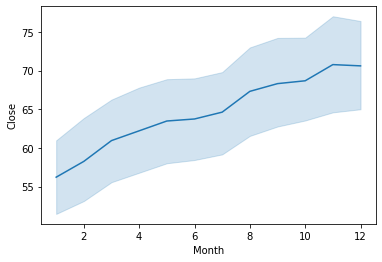

In [51]:
sns.lineplot(x='Month', y='Close', data=aapl)

<AxesSubplot:xlabel='Week', ylabel='Close'>

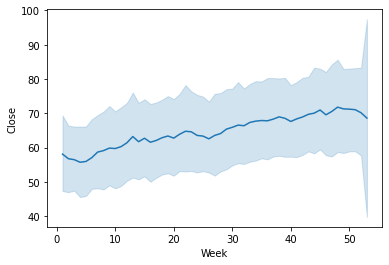

In [52]:
sns.lineplot(x='Week', y='Close', data=aapl)

<AxesSubplot:xlabel='Year', ylabel='Close'>

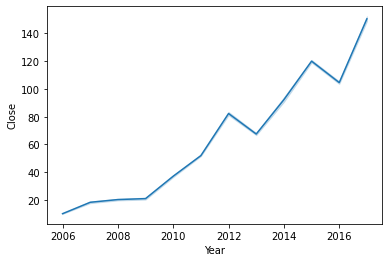

In [53]:
sns.lineplot(x='Year', y='Close', data=aapl)

# Amzn

<AxesSubplot:xlabel='Month', ylabel='Close'>

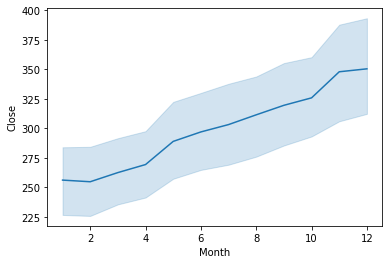

In [54]:
sns.lineplot(x='Month', y='Close', data=amzn)

<AxesSubplot:xlabel='Week', ylabel='Close'>

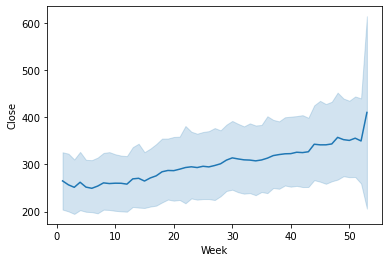

In [55]:
sns.lineplot(x='Week', y='Close', data=amzn)

<AxesSubplot:xlabel='Year', ylabel='Close'>

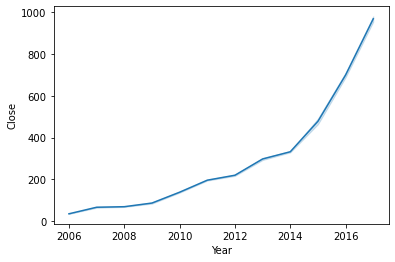

In [56]:
sns.lineplot(x='Year', y='Close', data=amzn)

# Googl

<AxesSubplot:xlabel='Month', ylabel='Close'>

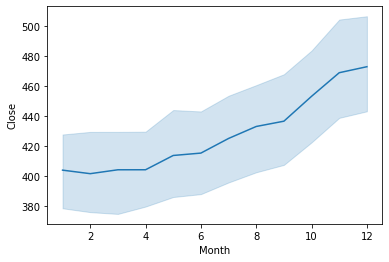

In [57]:
sns.lineplot(x='Month', y='Close', data=googl)

<AxesSubplot:xlabel='Week', ylabel='Close'>

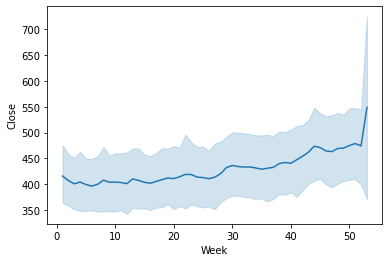

In [58]:
sns.lineplot(x='Week', y='Close', data=googl)

<AxesSubplot:xlabel='Year', ylabel='Close'>

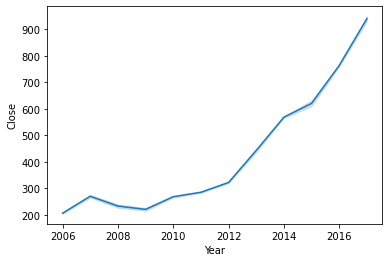

In [59]:
sns.lineplot(x='Year', y='Close', data=googl)

# Nke

<AxesSubplot:xlabel='Month', ylabel='Close'>

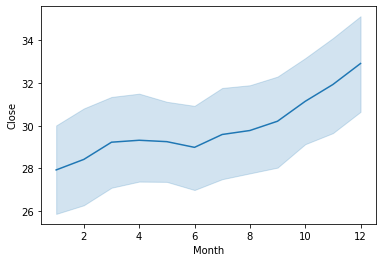

In [60]:
sns.lineplot(x='Month', y='Close', data=nke)

<AxesSubplot:xlabel='Week', ylabel='Close'>

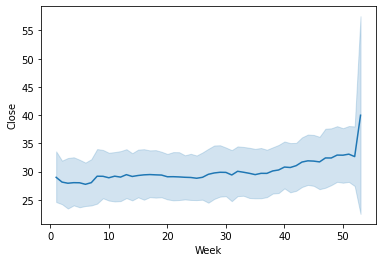

In [61]:
sns.lineplot(x='Week', y='Close', data=nke)

<AxesSubplot:xlabel='Year', ylabel='Close'>

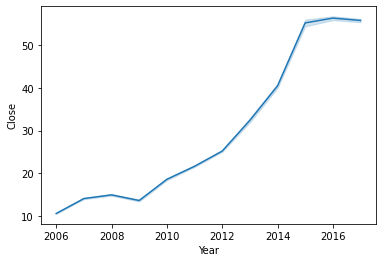

In [62]:
sns.lineplot(x='Year', y='Close', data=nke)

# Vz

<AxesSubplot:xlabel='Month', ylabel='Close'>

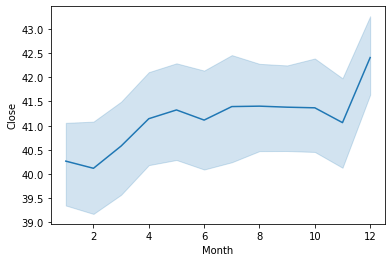

In [63]:
sns.lineplot(x='Month', y='Close', data=vz)

<AxesSubplot:xlabel='Week', ylabel='Close'>

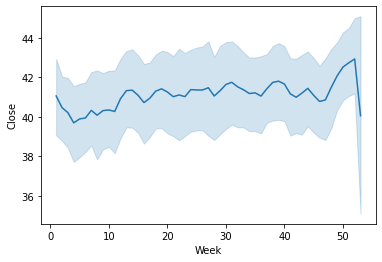

In [64]:
sns.lineplot(x='Week', y='Close', data=vz)

<AxesSubplot:xlabel='Year', ylabel='Close'>

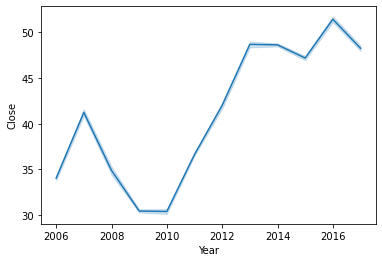

In [65]:
sns.lineplot(x='Year', y='Close', data=vz)

In [66]:
aapl.corr()

,Open,Close,Month,Year,Week
Open,1.000000,0.999777,0.098715,0.947631,0.099056
Close,0.999777,1.000000,0.098543,0.947858,0.098915
Month,0.098715,0.098543,1.000000,0.000075,0.978078
Year,0.947631,0.947858,0.000075,1.000000,0.000915
Week,0.099056,0.098915,0.978078,0.000915,1.000000


In [67]:
amzn.corr()

,Open,Close,Month,Year,Week
Open,1.000000,0.999833,0.113344,0.884776,0.113932
Close,0.999833,1.000000,0.113022,0.884915,0.113579
Month,0.113344,0.113022,1.000000,0.000075,0.978078
Year,0.884776,0.884915,0.000075,1.000000,0.000915
Week,0.113932,0.113579,0.978078,0.000915,1.000000


In [68]:
googl.corr()

,Open,Close,Month,Year,Week
Open,1.000000,0.999742,0.097912,0.895089,0.099043
Close,0.999742,1.000000,0.098266,0.895234,0.099415
Month,0.097912,0.098266,1.000000,0.000075,0.978078
Year,0.895089,0.895234,0.000075,1.000000,0.000915
Week,0.099043,0.099415,0.978078,0.000915,1.000000


In [69]:
nke.corr()

,Open,Close,Month,Year,Week
Open,1.000000,0.999731,0.074182,0.935972,0.074466
Close,0.999731,1.000000,0.074089,0.936234,0.074339
Month,0.074182,0.074089,1.000000,0.000112,0.978082
Year,0.935972,0.936234,0.000112,1.000000,0.000893
Week,0.074466,0.074339,0.978082,0.000893,1.000000


In [70]:
vz.corr()

,Open,Close,Month,Year,Week
Open,1.000000,0.998392,0.060897,0.760721,0.060119
Close,0.998392,1.000000,0.060859,0.760677,0.060257
Month,0.060897,0.060859,1.000000,0.000112,0.978082
Year,0.760721,0.760677,0.000112,1.000000,0.000893
Week,0.060119,0.060257,0.978082,0.000893,1.000000
